<a href="https://colab.research.google.com/github/mairapineda/Deep_Learning/blob/main/P2_T2_1_deep_learning_mercadeo_bancario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Metadata:
----
*   @Autor:Julian Camilo Escobar Araque
*   @Date: 2022/05/28
*   @Description: Mercadeo Banacario con DL


Las variables del dataset son las siguientes: 

1. edad (numérica)
2. trabajo: tipo de trabajo (categórico: "admin.”, "housemaid", "management", "retired", "self-employed", "student", "technician", "unemployed", "unknown")
3. conyugal: estado civil (categórico: "divorciado", "casado", "único", "desconocido")
4. educación (categórica: “preschool", “primary_school", “tecnical_school", " Technological_school", "illiterate", "professional.course", "university.degree", "unknown")
5. Total_hijos: número total de hijos
6. credito_sin_pago: ¿tiene crédito en incumplimiento de pago? (categóricamente: "no", "sí", "desconocido")
7. prestamo_vivienda: ¿tiene préstamo de vivienda? (categóricamente: "no", "sí", "desconocido")
8. prestamo_personal: ¿tiene préstamo personal? (categóricamente: "no", "sí", "desconocido")
9. valor_préstamo:(numérico) es el valor total del prestamos que tiene con el banco
10. tarjetas_credito: Número de tarjetas de crédito con otros bancos
11. contacto: tipo de comunicación de contacto (categórico: "celular", "teléfono")
12. mes: último mes de contacto del año (categórico: "jan", "feb", "mar", ..., "nov", "dec")
13. dia_semana: último día de contacto de la semana (categórico: "mon", "tue", "wed", "thu", "fri")
14. duracion_ultimo_contacto: duración del último contacto, en segundos (numérico). Nota importante: este atributo afecta en gran medida al destino de salida (p. ej., si
duration-0 y 'no').
15. campanna: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)
16. dias_ultimo_contacto: número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior
17. anterior_contacto: número de contactos realizados antes de esta campaña y para este cliente (numérico)
18. resultado_anterior: resultado de la campaña de marketing anterior (categórica: "fracaso", "inexistente", "éxito")
19. numero_empleados: número de empleados que tiene a su cargo — (numérico)
20. Predecir variable (objetivo deseado): (binario: "1", significa "Sí", "0" significa "No")




##P1.Importando librerias.

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Dense

from sklearn import preprocessing # para convertir datos categoricos a numericos
le =preprocessing.LabelEncoder()  #instanciamos el Codificador 

##P2. Cargue del dataset

In [4]:
df_mb = pd.read_csv('https://raw.githubusercontent.com/JulianEscobar1234/DeepLearnig/main/Deep_Learning/Datasheet/mercadeo_bancario.csv', encoding='utf-8')
df_mb.head()

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,blue-collar,married,preschool,7,unknown,yes,no,268017,0,5,cellular,aug,thu,210,43,0,88,0
1,53,technician,married,unknown,1,no,no,no,0,0,0,cellular,nov,fri,138,0,0,14,0
2,28,management,single,university.degree,3,no,yes,no,308036,0,0,cellular,jun,thu,339,27,2,1993,1
3,39,services,married,Technological_school,1,no,no,no,0,0,4,cellular,apr,fri,185,0,0,1338,0
4,55,retired,married,preschool,2,no,yes,no,249888,0,4,cellular,aug,fri,137,2,1,1184,1


In [5]:
df_mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edad                      41188 non-null  int64 
 1   trabajo                   41188 non-null  object
 2   estado_civil              41188 non-null  object
 3   educacion                 41188 non-null  object
 4   total_hijos               41188 non-null  int64 
 5   credito_sin_pago          41188 non-null  object
 6   prestamo_vivienda         41188 non-null  object
 7   prestamo_personal         41188 non-null  object
 8   valor_prestamo            41188 non-null  int64 
 9   dias_ultimo_pago          41188 non-null  int64 
 10  tarjetas_credito          41188 non-null  int64 
 11  contacto                  41188 non-null  object
 12  mes                       41188 non-null  object
 13  dia_semana                41188 non-null  object
 14  duracion_ultimo_contac

###P2.1 Convertir Data Categorica en Data Numerica

In [6]:
trabajo = {
    'unknown': 0,
    'admin.': 1, 
    'housemaid': 2, 
    'management': 3, 
    'retired': 4, 
    'self-employed': 5, 
    'student': 6, 
    'technician': 7, 
    'unemployed': 8,
    'blue-collar': 9,
    'services': 10,
    'entrepreneur': 11
    }
df_mb['trabajo'] = df_mb['trabajo'].map(trabajo)

In [7]:
estado_civil = {
    'unknown': 0,
    'single': 1,
    'married': 2,
    'divorced' : 3
    }
df_mb['estado_civil '] = df_mb['estado_civil '].map(estado_civil)

In [8]:
educacion = {
    'unknown': 0,
    'preschool': 1,
    'primary_school': 2,
    'tecnical_school': 3,
    'Technological_school': 4,
    'illiterate': 5,
    'professional.course': 6,
    'university.degree': 7
}
df_mb['educacion'] = df_mb['educacion'].map(educacion)

In [9]:
credito_sin_pago = {
    'no': 0,
    'yes': 1,
    'unknown': 2
}
df_mb['credito_sin_pago'] = df_mb['credito_sin_pago'].map(credito_sin_pago)

In [10]:
prestamo_vivienda = {
    'no': 0,
    'yes': 1,
    'unknown': 2
}
df_mb['prestamo_vivienda'] = df_mb['prestamo_vivienda'].map(prestamo_vivienda)

In [11]:
prestamo_personal = {
    'no': 0,
    'yes': 1,
    'unknown': 2
}
df_mb['prestamo_personal'] = df_mb['prestamo_personal'].map(prestamo_personal)

In [12]:
contacto = {
    'cellular': 1,
    'telephone': 2,
}
df_mb['contacto'] = df_mb['contacto'].map(contacto)

In [13]:
mes = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}
df_mb['mes'] = df_mb['mes'].map(mes)

In [14]:
dia_semana = {
    'sun': 1,
    'mon': 2,
    'tue': 3,
    'wed': 4,
    'thu': 5,
    'fri': 6,
    'sat': 7
}
df_mb['dia_semana'] = df_mb['dia_semana'].map(dia_semana)

In [15]:
df_mb.head()

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,9,2,1,7,2,1,0,268017,0,5,1,8,5,210,43,0,88,0
1,53,7,2,0,1,0,0,0,0,0,0,1,11,6,138,0,0,14,0
2,28,3,1,7,3,0,1,0,308036,0,0,1,6,5,339,27,2,1993,1
3,39,10,2,4,1,0,0,0,0,0,4,1,4,6,185,0,0,1338,0
4,55,4,2,1,2,0,1,0,249888,0,4,1,8,6,137,2,1,1184,1


In [16]:
df_mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   edad                      41188 non-null  int64
 1   trabajo                   41188 non-null  int64
 2   estado_civil              41188 non-null  int64
 3   educacion                 41188 non-null  int64
 4   total_hijos               41188 non-null  int64
 5   credito_sin_pago          41188 non-null  int64
 6   prestamo_vivienda         41188 non-null  int64
 7   prestamo_personal         41188 non-null  int64
 8   valor_prestamo            41188 non-null  int64
 9   dias_ultimo_pago          41188 non-null  int64
 10  tarjetas_credito          41188 non-null  int64
 11  contacto                  41188 non-null  int64
 12  mes                       41188 non-null  int64
 13  dia_semana                41188 non-null  int64
 14  duracion_ultimo_contacto  41188 non-nu

##P3. Dividir los datos de entrada y salida (categoria).

In [17]:
X = df_mb[['trabajo','edad','educacion']] 
y = df_mb['si_no']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   trabajo    41188 non-null  int64
 1   edad       41188 non-null  int64
 2   educacion  41188 non-null  int64
dtypes: int64(3)
memory usage: 965.5 KB


In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25,random_state=42)

##P4. creando el modelo

In [19]:
# crea el modelo
model3 = Sequential()
model3.add(Dense(8, input_dim=3, activation='relu'))   #dos capas en una(1° con 8 neuronas (caracteristicas de entrada), 2° con 12 neuronas  )
model3.add(Dense(16, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))  #al ser una clasificación binaria usaremos sigmoidal
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 32        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 753
Trainable params: 753
Non-trainable params: 0
_________________________________________________________________


##P5. compilando modelo

In [20]:
model3.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

##P6. Entrenando modelo

In [22]:
historial= model3.fit(X_train, Y_train, epochs=100, batch_size=10)

Epoch 1/100
3090/3090 [==============================] - 6s 2ms/step - loss: 0.3507 - accuracy: 0.8882
Epoch 2/100
3090/3090 [==============================] - 5s 2ms/step - loss: 0.3481 - accuracy: 0.8881
Epoch 3/100
3090/3090 [==============================] - 7s 2ms/step - loss: 0.3451 - accuracy: 0.8882
Epoch 4/100
3090/3090 [==============================] - 5s 2ms/step - loss: 0.3431 - accuracy: 0.8882
Epoch 5/100
3090/3090 [==============================] - 5s 2ms/step - loss: 0.3422 - accuracy: 0.8880
Epoch 6/100
3090/3090 [==============================] - 5s 2ms/step - loss: 0.3418 - accuracy: 0.8881
Epoch 7/100
3090/3090 [==============================] - 5s 2ms/step - loss: 0.3410 - accuracy: 0.8883
Epoch 8/100
3090/3090 [==============================] - 5s 2ms/step - loss: 0.3403 - accuracy: 0.8883
Epoch 9/100
3090/3090 [==============================] - 5s 2ms/step - loss: 0.3403 - accuracy: 0.8883
Epoch 10/100
3090/3090 [==============================] - 5s 2ms/step - l

##P7.Graficamos el entrenamiento

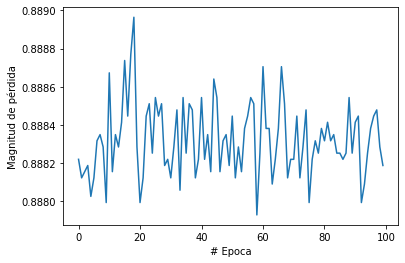

In [23]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["accuracy"])

##P8. Evaluar la Red Neuronal

In [24]:
# evalua el modelo
scores3 = model3.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model3.metrics_names[1], scores3[1]*100))

322/322 [==============================] - 1s 1ms/step - loss: 0.3431 - accuracy: 0.8848

accuracy: 88.48%


##P9.exportar modelo

In [25]:
model3.save('DL_MERCADO_BANCARIO.h5')